In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Models
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


# Selected features for training
selected_features = [
    'Flow Duration', 'Flow Bytes/s', 'Flow Packets/s',
    'Total Fwd Packets', 'Total Backward Packets', 'Average Packet Size', 'Packet Length Std',
    'Flow IAT Mean', 'Flow IAT Std', 'Fwd IAT Mean', 'Bwd IAT Mean',
    'SYN Flag Count', 'ACK Flag Count', 'RST Flag Count'
]

# File paths for training datasets
data_files = [
    'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Monday-WorkingHours.pcap_ISCX.csv',
    'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'Tuesday-WorkingHours.pcap_ISCX.csv',
    'Wednesday-workingHours.pcap_ISCX.csv'
]

# -----------------------------
# Load and Preprocess Data
# -----------------------------
print("Loading and concatenating datasets...")
data = pd.concat([pd.read_csv(file) for file in data_files])

# Renaming columns by removing leading/trailing whitespace
data.columns = data.columns.str.strip()

# Dropping duplicates and handling NaN and infinite values
data = data.drop_duplicates()
data = data.replace([np.inf, -np.inf], np.nan)

# Fill missing values
for col in selected_features:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())

# Encode labels (0 = BENIGN, 1 = MALICIOUS)
data['Label'] = data['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Prepare features and labels
X = data[selected_features]
y = data['Label']

# -----------------------------
# Scaling and Splitting Data
# -----------------------------
print("Scaling data...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler and selected features
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(selected_features, 'selected_features.joblib')

print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# -----------------------------
# Train Models
# -----------------------------
def train_and_evaluate(model, model_name):
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    joblib.dump(model, f'{model_name}_model.joblib')
    print(f"{model_name} model has been saved.")

    # Evaluate Model
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
train_and_evaluate(rf, 'RandomForest')

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
train_and_evaluate(dt, 'DecisionTree')

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn, 'KNN')

# Isolation Forest
iso_forest = IsolationForest(n_estimators=200, random_state=42, contamination=0.1)
print("\nTraining Isolation Forest (unsupervised anomaly detection)...")
iso_forest.fit(X_train)
joblib.dump(iso_forest, 'IsolationForest_model.joblib')
print("Isolation Forest model has been saved.")


# Logistic Regression
lr = LogisticRegression(max_iter=500)
train_and_evaluate(lr, 'LogisticRegression')

# Naive Bayes
nb = GaussianNB()
train_and_evaluate(nb, 'NaiveBayes')

print("\nTraining and evaluation of all models complete.")


Loading and concatenating datasets...
Scaling data...
Splitting data into training and testing sets...

Training RandomForest...
RandomForest model has been saved.

RandomForest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    419297
           1       0.99      0.99      0.99     85176

    accuracy                           1.00    504473
   macro avg       1.00      0.99      0.99    504473
weighted avg       1.00      1.00      1.00    504473

RandomForest Confusion Matrix:
 [[418800    497]
 [  1194  83982]]

Training DecisionTree...
DecisionTree model has been saved.

DecisionTree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    419297
           1       0.99      0.99      0.99     85176

    accuracy                           1.00    504473
   macro avg       1.00      0.99      0.99    504473
weighted avg       1.00      1.00

Loading and concatenating testing datasets...

Evaluating RandomForest with threshold 0.01...

Classification Report (RandomForest):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     19061
           1       0.92      0.74      0.82    288198

    accuracy                           0.69    307259
   macro avg       0.46      0.37      0.41    307259
weighted avg       0.86      0.69      0.77    307259

Confusion Matrix (RandomForest):
 [[    95  18966]
 [ 75585 212613]]

Evaluating DecisionTree with threshold 0.01...

Classification Report (DecisionTree):
               precision    recall  f1-score   support

           0       0.06      1.00      0.12     19061
           1       0.48      0.00      0.00    288198

    accuracy                           0.06    307259
   macro avg       0.27      0.50      0.06    307259
weighted avg       0.46      0.06      0.01    307259

Confusion Matrix (DecisionTree):
 [[ 19033     28]
 [28

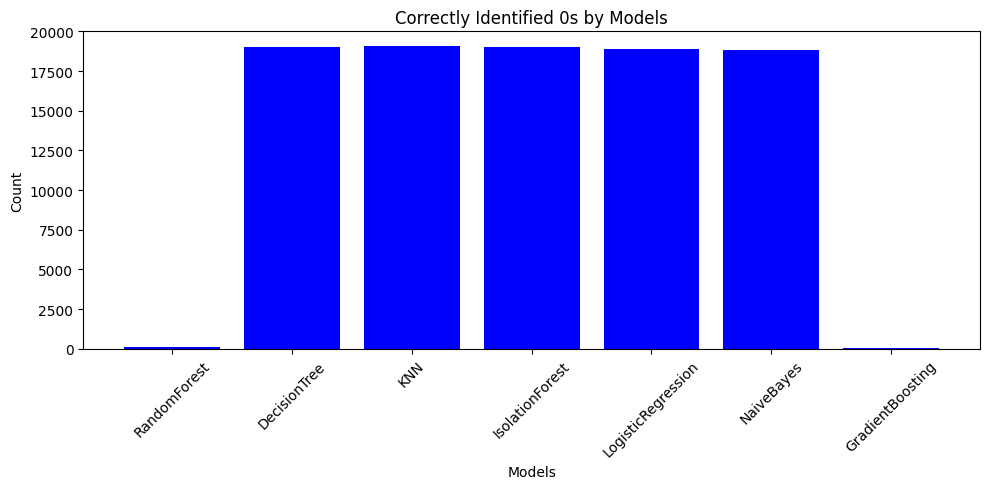

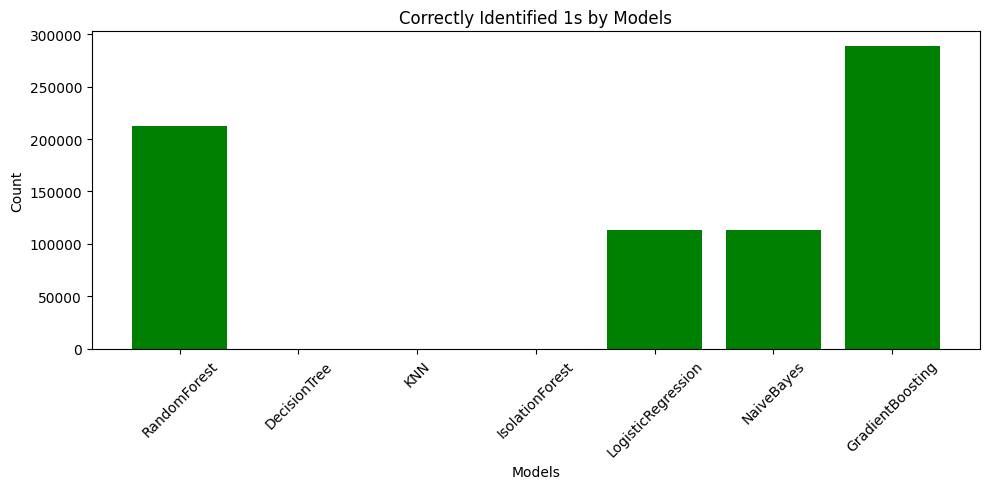

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Models
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# File paths for the testing datasets
test_file_paths = [
    'network_capture/30_nmap_scan_labeled.csv',
    'network_capture/120_nmap_scan_labeled.csv',
    'network_capture/ddos_attack_labeled.csv',
    'network_capture/new_traffic_labeled.csv'
]

# Load the saved scaler, Gradient Boosting model, and selected features
scaler = joblib.load('scaler.joblib')
gb = joblib.load('gradient_boosting_model.joblib')
selected_features = joblib.load('selected_features.joblib')

# Load and concatenate all testing datasets
print("Loading and concatenating testing datasets...")
test_data = pd.concat([pd.read_csv(file) for file in test_file_paths])

# Renaming the columns by removing leading/trailing whitespace
test_data.columns = test_data.columns.str.strip()

# Dropping duplicates
test_data = test_data.drop_duplicates()

# Replacing any infinite values (positive or negative) with NaN
test_data = test_data.replace([np.inf, -np.inf], np.nan)

# Fill missing values for specific columns in testing data
for col in selected_features:
    if col in test_data.columns:
        test_data[col] = test_data[col].fillna(test_data[col].median())

# Encode labels for binary classification
test_data['Label'] = test_data['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Use only the selected features in the test data
X_test = test_data[selected_features].copy()
y_test = test_data['Label'].copy()

# Standardize the test data using the loaded scaler
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Evaluate Models with Threshold
# -----------------------------
def evaluate_model_with_threshold(model_name, model, threshold=0.5):
    print(f"\nEvaluating {model_name} with threshold {threshold}...")
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(X_test_scaled)[:, 1]
        y_pred = (probabilities >= threshold).astype(int)
    else:
        y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)
    print(f"\nClassification Report ({model_name}):\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix ({model_name}):\n", cm)
    return cm

# Load and evaluate models with thresholds
results = {}

rf = joblib.load('RandomForest_model.joblib')
results['RandomForest'] = evaluate_model_with_threshold('RandomForest', rf, threshold=0.01)

dt = joblib.load('DecisionTree_model.joblib')
results['DecisionTree'] = evaluate_model_with_threshold('DecisionTree', dt, threshold=0.01)

knn = joblib.load('KNN_model.joblib')
results['KNN'] = evaluate_model_with_threshold('KNN', knn, threshold=0.01)

iso_forest = joblib.load('IsolationForest_model.joblib')
print("\nEvaluating Isolation Forest (unsupervised anomaly detection)...")
isolation_pred = iso_forest.predict(X_test_scaled)
isolation_pred_binary = np.where(isolation_pred == -1, 1, 0)
isolation_cm = confusion_matrix(y_test, isolation_pred_binary)
print("\nClassification Report (Isolation Forest):\n", classification_report(y_test, isolation_pred_binary))
print("Confusion Matrix (Isolation Forest):\n", isolation_cm)
results['IsolationForest'] = isolation_cm

lr = joblib.load('LogisticRegression_model.joblib')
results['LogisticRegression'] = evaluate_model_with_threshold('LogisticRegression', lr, threshold=0.01)

nb = joblib.load('NaiveBayes_model.joblib')
results['NaiveBayes'] = evaluate_model_with_threshold('NaiveBayes', nb, threshold=0.01)

gb_cm = evaluate_model_with_threshold('GradientBoosting', gb, threshold=0.01)
results['GradientBoosting'] = gb_cm

print("\nEvaluation of all models complete.")

# -----------------------------
# Generate Graphs
# -----------------------------
labels = list(results.keys())
correct_zeros = [results[model][0, 0] for model in labels]  # True Negatives
correct_ones = [results[model][1, 1] for model in labels]  # True Positives

plt.figure(figsize=(10, 5))
plt.bar(labels, correct_zeros, color='blue')
plt.title('Correctly Identified 0s by Models')
plt.xlabel('Models')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('correct_zeros.png')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(labels, correct_ones, color='green')
plt.title('Correctly Identified 1s by Models')
plt.xlabel('Models')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('correct_ones.png')
plt.show()


Loading and concatenating testing datasets...

Evaluating RandomForest with threshold 0.01...

Classification Report (RandomForest):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     19061
           1       0.92      0.74      0.82    288198

    accuracy                           0.69    307259
   macro avg       0.46      0.37      0.41    307259
weighted avg       0.86      0.69      0.77    307259

Confusion Matrix (RandomForest):
 [[    95  18966]
 [ 75585 212613]]

Evaluating DecisionTree with threshold 0.01...

Classification Report (DecisionTree):
               precision    recall  f1-score   support

           0       0.06      1.00      0.12     19061
           1       0.48      0.00      0.00    288198

    accuracy                           0.06    307259
   macro avg       0.27      0.50      0.06    307259
weighted avg       0.46      0.06      0.01    307259

Confusion Matrix (DecisionTree):
 [[ 19033     28]
 [28

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

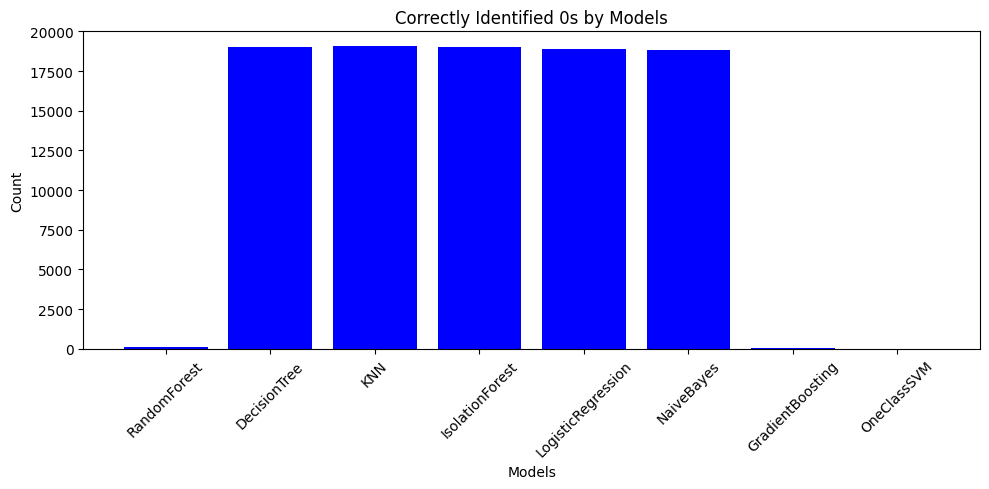

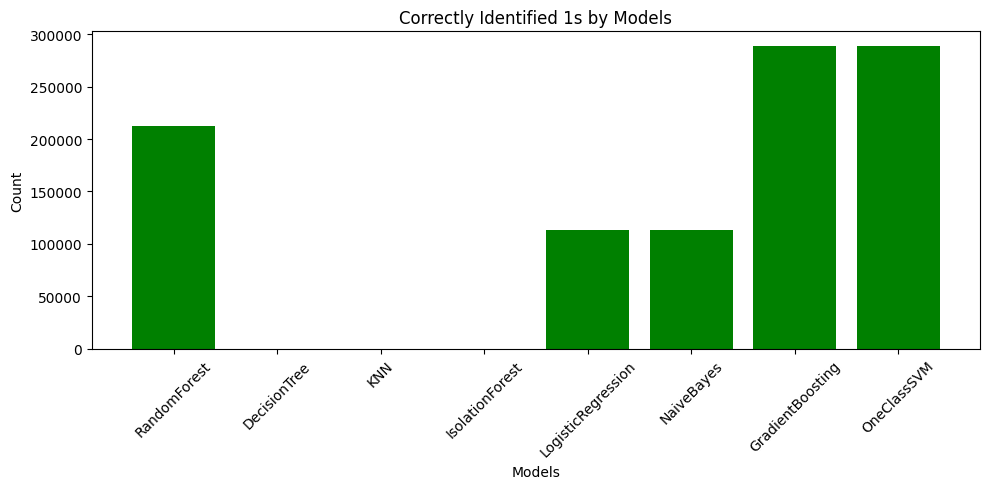

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Models
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import OneClassSVM  # Import One-Class SVM

# File paths for the testing datasets
test_file_paths = [
    'network_capture/30_nmap_scan_labeled.csv',
    'network_capture/120_nmap_scan_labeled.csv',
    'network_capture/ddos_attack_labeled.csv',
    'network_capture/new_traffic_labeled.csv'
]

# Load the saved scaler, Gradient Boosting model, and selected features
scaler = joblib.load('scaler.joblib')
gb = joblib.load('gradient_boosting_model.joblib')
selected_features = joblib.load('selected_features.joblib')

# Load and concatenate all testing datasets
print("Loading and concatenating testing datasets...")
test_data = pd.concat([pd.read_csv(file) for file in test_file_paths])

# Renaming the columns by removing leading/trailing whitespace
test_data.columns = test_data.columns.str.strip()

# Dropping duplicates
test_data = test_data.drop_duplicates()

# Replacing any infinite values (positive or negative) with NaN
test_data = test_data.replace([np.inf, -np.inf], np.nan)

# Fill missing values for specific columns in testing data
for col in selected_features:
    if col in test_data.columns:
        test_data[col] = test_data[col].fillna(test_data[col].median())

# Encode labels for binary classification
test_data['Label'] = test_data['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Use only the selected features in the test data
X_test = test_data[selected_features].copy()
y_test = test_data['Label'].copy()

# Standardize the test data using the loaded scaler
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Evaluate Models with Threshold
# -----------------------------
def evaluate_model_with_threshold(model_name, model, threshold=0.5):
    print(f"\nEvaluating {model_name} with threshold {threshold}...")
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(X_test_scaled)[:, 1]
        y_pred = (probabilities >= threshold).astype(int)
    else:
        y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)
    print(f"\nClassification Report ({model_name}):\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix ({model_name}):\n", cm)
    return cm

# Load and evaluate models with thresholds
results = {}

rf = joblib.load('RandomForest_model.joblib')
results['RandomForest'] = evaluate_model_with_threshold('RandomForest', rf, threshold=0.01)

dt = joblib.load('DecisionTree_model.joblib')
results['DecisionTree'] = evaluate_model_with_threshold('DecisionTree', dt, threshold=0.01)

knn = joblib.load('KNN_model.joblib')
results['KNN'] = evaluate_model_with_threshold('KNN', knn, threshold=0.01)

iso_forest = joblib.load('IsolationForest_model.joblib')
print("\nEvaluating Isolation Forest (unsupervised anomaly detection)...")
isolation_pred = iso_forest.predict(X_test_scaled)
isolation_pred_binary = np.where(isolation_pred == -1, 1, 0)
isolation_cm = confusion_matrix(y_test, isolation_pred_binary)
print("\nClassification Report (Isolation Forest):\n", classification_report(y_test, isolation_pred_binary))
print("Confusion Matrix (Isolation Forest):\n", isolation_cm)
results['IsolationForest'] = isolation_cm

lr = joblib.load('LogisticRegression_model.joblib')
results['LogisticRegression'] = evaluate_model_with_threshold('LogisticRegression', lr, threshold=0.01)

nb = joblib.load('NaiveBayes_model.joblib')
results['NaiveBayes'] = evaluate_model_with_threshold('NaiveBayes', nb, threshold=0.01)

gb_cm = evaluate_model_with_threshold('GradientBoosting', gb, threshold=0.01)
results['GradientBoosting'] = gb_cm

# -----------------------------
# Evaluate One-Class SVM
# -----------------------------
svm_model = joblib.load('oneclass_svm_model.joblib')
print("\nEvaluating One-Class SVM...")
svm_pred = svm_model.predict(X_test_scaled)
svm_pred_binary = np.where(svm_pred == -1, 1, 0)  # -1 indicates anomaly
svm_cm = confusion_matrix(y_test, svm_pred_binary)
print("\nClassification Report (One-Class SVM):\n", classification_report(y_test, svm_pred_binary))
print("Confusion Matrix (One-Class SVM):\n", svm_cm)
results['OneClassSVM'] = svm_cm

print("\nEvaluation of all models complete.")

# -----------------------------
# Generate Graphs
# -----------------------------
labels = list(results.keys())
correct_zeros = [results[model][0, 0] for model in labels]  # True Negatives
correct_ones = [results[model][1, 1] for model in labels]  # True Positives

plt.figure(figsize=(10, 5))
plt.bar(labels, correct_zeros, color='blue')
plt.title('Correctly Identified 0s by Models')
plt.xlabel('Models')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('correct_zeros.png')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(labels, correct_ones, color='green')
plt.title('Correctly Identified 1s by Models')
plt.xlabel('Models')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('correct_ones.png')
plt.show()


Loading and concatenating testing datasets...

Classification Report (One-Class SVM):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     19061
           1       0.94      1.00      0.97    288198

    accuracy                           0.94    307259
   macro avg       0.47      0.50      0.48    307259
weighted avg       0.88      0.94      0.91    307259

Confusion Matrix (One-Class SVM):
 [[     0  19061]
 [     0 288198]]


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

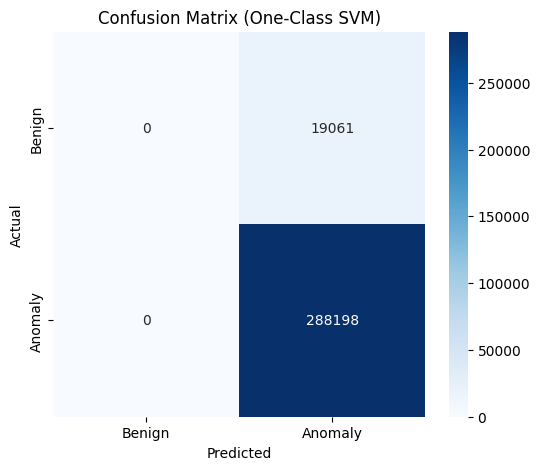


Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.96      0.00      0.01     19061
           1       0.94      1.00      0.97    288198

    accuracy                           0.94    307259
   macro avg       0.95      0.50      0.49    307259
weighted avg       0.94      0.94      0.91    307259

Confusion Matrix (Gradient Boosting):
 [[    79  18982]
 [     3 288195]]


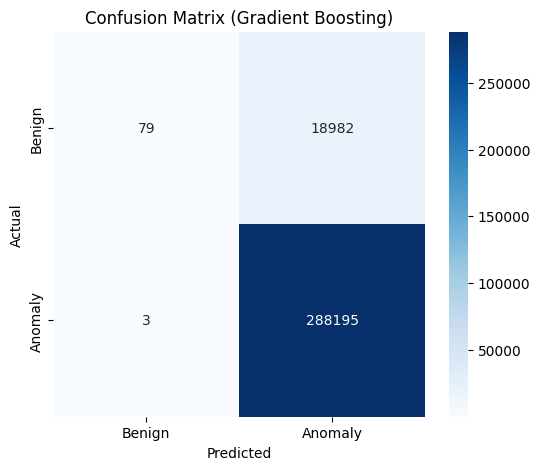


Classification Report (Combined One-Class SVM and Gradient Boosting):
               precision    recall  f1-score   support

           0       0.96      0.00      0.01     19061
           1       0.94      1.00      0.97    288198

    accuracy                           0.94    307259
   macro avg       0.95      0.50      0.49    307259
weighted avg       0.94      0.94      0.91    307259

Confusion Matrix (Combined One-Class SVM and Gradient Boosting):
 [[    79  18982]
 [     3 288195]]


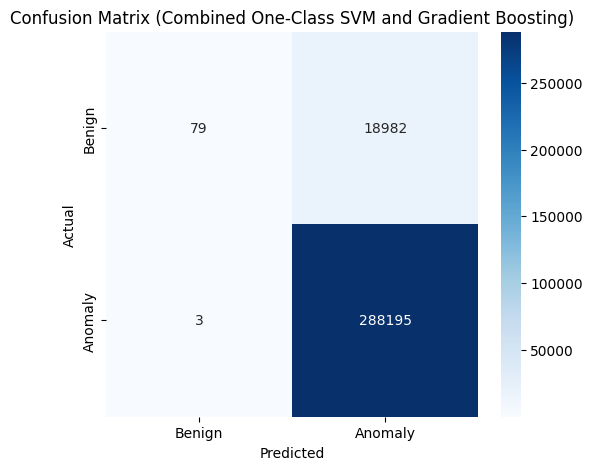

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# File paths for the testing datasets
test_file_paths = [
    'network_capture/30_nmap_scan_labeled.csv',
    'network_capture/120_nmap_scan_labeled.csv',
    'network_capture/ddos_attack_labeled.csv',
    'network_capture/new_traffic_labeled.csv'
]

# Load the saved scaler, One-Class SVM model, Gradient Boosting model, and selected features
scaler = joblib.load('scaler.joblib')
svm_model = joblib.load('oneclass_svm_model.joblib')
gb = joblib.load('gradient_boosting_model.joblib')
selected_features = joblib.load('selected_features.joblib')  # Load selected features

# Threshold for Gradient Boosting
threshold = 0.01  # Adjust this as needed

# Load and concatenate all testing datasets
print("Loading and concatenating testing datasets...")
test_data = pd.concat([pd.read_csv(file) for file in test_file_paths])

# Renaming the columns by removing leading/trailing whitespace
test_data.columns = test_data.columns.str.strip()

# Dropping duplicates
test_data = test_data.drop_duplicates()

# Replacing any infinite values (positive or negative) with NaN
test_data = test_data.replace([np.inf, -np.inf], np.nan)

# Fill missing values for specific columns in testing data
for col in selected_features:
    if col in test_data.columns:
        # Assign back after filling missing values
        test_data[col] = test_data[col].fillna(test_data[col].median())

# Encode labels for binary classification
test_data['Label'] = test_data['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Use only the selected features in the test data
X_test = test_data[selected_features].copy()
y_test = test_data['Label'].copy()

# Standardize the test data using the loaded scaler
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Step 1: One-Class SVM prediction
# -----------------------------

# Get predictions from One-Class SVM
svm_pred = svm_model.predict(X_test_scaled)
# Convert SVM predictions to binary format (1 for anomaly, 0 for benign)
svm_pred_binary = np.where(svm_pred == -1, 1, 0)

# Display classification report and confusion matrix for One-Class SVM
print("\nClassification Report (One-Class SVM):\n", classification_report(y_test, svm_pred_binary))
print("Confusion Matrix (One-Class SVM):\n", confusion_matrix(y_test, svm_pred_binary))

# Plot Confusion Matrix for One-Class SVM
cm_svm = confusion_matrix(y_test, svm_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Anomaly'], yticklabels=['Benign', 'Anomaly'])
plt.title('Confusion Matrix (One-Class SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -----------------------------
# Step 2: Gradient Boosting prediction
# -----------------------------

# Function for threshold-based predictions
def predict_with_threshold(model, X, threshold=0.5):
    # Get prediction probabilities
    probabilities = model.predict_proba(X)[:, 1]  # Probability of the positive class
    # Apply threshold to classify
    return (probabilities >= threshold).astype(int)

# Get predictions from Gradient Boosting
gb_pred_binary = predict_with_threshold(gb, X_test_scaled, threshold)

# Display classification report and confusion matrix for Gradient Boosting
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, gb_pred_binary))
print("Confusion Matrix (Gradient Boosting):\n", confusion_matrix(y_test, gb_pred_binary))

# Plot Confusion Matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, gb_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Anomaly'], yticklabels=['Benign', 'Anomaly'])
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -----------------------------
# Step 3: Combined approach - Pass SVM anomalies to Gradient Boosting
# -----------------------------

# Filter anomalies flagged by SVM
is_svm_anomaly = (svm_pred == -1)
X_gb_input = X_test_scaled[is_svm_anomaly]
y_gb_input = y_test[is_svm_anomaly]

# Get predictions for SVM-flagged anomalies from Gradient Boosting
gb_anomaly_pred = predict_with_threshold(gb, X_gb_input, threshold)

# Initialize combined predictions as benign (0) and update only SVM anomalies based on Gradient Boosting results
combined_pred = np.zeros(len(y_test), dtype=int)
combined_pred[is_svm_anomaly] = gb_anomaly_pred

# Display classification report and confusion matrix for combined approach
print("\nClassification Report (Combined One-Class SVM and Gradient Boosting):\n", classification_report(y_test, combined_pred))
print("Confusion Matrix (Combined One-Class SVM and Gradient Boosting):\n", confusion_matrix(y_test, combined_pred))

# Plot Confusion Matrix for Combined approach
cm_combined = confusion_matrix(y_test, combined_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Anomaly'], yticklabels=['Benign', 'Anomaly'])
plt.title('Confusion Matrix (Combined One-Class SVM and Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

